1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe.
Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков.
Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в
среднем определенную зависимость между переменными. Изучите параметры и
опишите взаимосвязи. Если параметров слишком много – может потребоваться
создать несколько графиков. Минимум один график (диаграмму рассеивания)
сделать по категориям (Например, зависимость зарплаты и возраста по каждой
должности. На таком графике различные должности должны быть показаны разными
цветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное
количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента
корреляции и ковариации. Построить heatmap (тепловую карту корреляции).
Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы
о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что
такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите
на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте
выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты -
высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой
новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например,
зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для
каждой категории на ном графике). Используйте для построения графиков разные
библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

**Цель работы:**
изучение связи между признаками двумерного набора данных, визуализация данных

# Загрузка набора данных

### Описание предметной области


Вариант №9

Набор данных: visit2.csv

Атрибуты:
- id
- страна
- тип устройства
- источник трафика
- старт сессии
- конец сесиии
- длительность сессии в минутах
- к-во кликов
- к-во покупок
- сумма покупки
- возраст

### 1.Чтение файла (набора данных)

In [226]:
import pandas as pd
import pandas as pandas
import seaborn as sn
import plotly as pl
from matplotlib import pyplot as plt


df = pd.read_csv('visits2.csv', delimiter='\s*;')
df.shape

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\max\AppData\Local\Temp\ipykernel_3024\1864694510.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('visits2.csv', delimiter='\s*;')
C:\Users\max\AppData\Local\Temp\ipykernel_3024\1864694510.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('visits2.csv', delimiter='\s*;')


(954, 11)

Используется regex для корректной обработки всех столбцов.

### 2. Обзор данных

2.1 Вывод первых 20 строк с помощью метода head.

In [227]:
df.head(20)

,user_id,region,device,channel,session_start,session_end,time_session,click_count,buy_count,price,age
0,278965908054,United States,iPhone,organic,01.05.2019 4:46,01.05.2019 4:47,1.0,0.0,0.0,0.0,31
1,244878945432,United States,Mac,organic,01.05.2019 16:44,01.05.2019 16:45,1.0,0.0,0.0,0.0,40
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32,83.0,28.0,6.0,14570.0,50
3,326433527971,United States,Android,TipTop,01.05.2019 0:29,01.05.2019 0:54,25.0,8.0,3.0,4411.0,38
4,349773784594,United States,Mac,organic,01.05.2019 3:33,01.05.2019 3:57,24.0,8.0,3.0,4411.0,63
5,90242400005,United States,Android,organic,01.05.2019 9:03,01.05.2019 10:08,65.0,22.0,4.0,11310.0,62
6,43958116050,United States,iPhone,organic,01.05.2019 9:37,01.05.2019 10:00,23.0,8.0,3.0,4411.0,60
7,15174034813,United States,Mac,organic,01.05.2019 13:33,01.05.2019 13:35,2.0,0.0,0.0,0.0,12
8,446013509831,United States,iPhone,organic,01.05.2019 14:44,01.05.2019 15:41,57.0,19.0,4.0,9872.0,52
9,100970711362,United States,Mac,FaceBoom,01.05.2019 6:20,01.05.2019 6:54,34.0,12.0,3.0,6326.0,25


2.2 Оценка данных с помощью метода info.


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        954 non-null    int64  
 1   region         953 non-null    object 
 2   device         953 non-null    object 
 3   channel        954 non-null    object 
 4   session_start  954 non-null    object 
 5   session_end    954 non-null    object 
 6   time_session   954 non-null    float64
 7   click_count    954 non-null    float64
 8   buy_count      954 non-null    float64
 9   price          954 non-null    float64
 10  age            954 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 82.1+ KB


Необходимо исправить тип данных двух столбцов к-ва на int, регион и девайс на категориальные, а время старта/конца на datetime.

2.3 Оценка данных с помощью метода describe.

In [229]:
df.describe().round(1)

,user_id,time_session,click_count,buy_count,price,age
count,9.540000e+02,954.0,954.0,954.0,954.0,954.0
mean,4.951807e+11,29.1,9.8,2.5,5341.6,39.8
std,2.899488e+11,27.1,9.2,1.6,5060.2,13.0
min,2.346325e+09,0.0,0.0,0.0,0.0,10.0
25%,2.295122e+11,9.0,3.0,2.0,2301.0,29.0
50%,4.984267e+11,21.0,7.0,2.0,3739.0,39.0
75%,7.525332e+11,42.0,14.0,3.0,7284.0,50.0
max,9.985130e+11,262.0,88.0,15.0,56546.0,71.0


 2.4 Оценка названий столбцов

In [230]:
df.columns.tolist()

['user_id',
 'region',
 'device',
 'channel',
 'session_start',
 'session_end',
 'time_session',
 'click_count',
 'buy_count',
 'price',
 'age']

Переименовывать столбцы не нужно.

### 3. Проверка пропусков

In [231]:
print("Пропущено ДО")
missing_values = df.isnull().sum()
print(missing_values)

df[df['region'].isnull() + df['device'].isnull()]

Пропущено ДО
user_id          0
region           1
device           1
channel          0
session_start    0
session_end      0
time_session     0
click_count      0
buy_count        0
price            0
age              0
dtype: int64


,user_id,region,device,channel,session_start,session_end,time_session,click_count,buy_count,price,age
33,750734101231,NaN,iPhone,MediaTornado,01.05.2019 7:57,01.05.2019 8:22,25.0,8.0,3.0,4411.0,54
802,141837741427,United States,NaN,MediaTornado,01.05.2019 1:59,01.05.2019 2:21,22.0,7.0,2.0,3739.0,34


In [232]:
def fill_popular(col):
    most_popular= df[col].value_counts().idxmax()
    df[col] = df[col].fillna(most_popular)

fill_popular('region')
fill_popular('device')

df.isnull().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
time_session     0
click_count      0
buy_count        0
price            0
age              0
dtype: int64

Пропущенные значения заполнены самыми популярными типами.

### 4. Проверка дубликатов

Проверка неявных дубликатов

In [233]:
for i in ["region", "device", "channel"]:
    display(df[i].unique())

array(['United States', 'Russia', 'USA'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC', 'MAC', 'IPHONE'], dtype=object)

array(['organic', 'TipTop', 'FaceBoom', 'MediaTornado'], dtype=object)

In [234]:
df.region = df.region.replace('USA', 'United States')
df.device = df.device.replace('IPHONE', 'iPhone')
df.device = df.device.replace('MAC device', 'MAC')
df.device = df.device.replace('Mac', 'MAC')

for i in ["region", "device", "channel"]:
    display(df[i].unique())

array(['United States', 'Russia'], dtype=object)

array(['iPhone', 'MAC', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'FaceBoom', 'MediaTornado'], dtype=object)

Найдены и исправлены неявные дубликаты в текстовых столбцах.

#### Проверка явных дубликатов

Для оценки ущерба явных дубликатов, можно воспользовать функцией *duplicated* вместе с функцией *sum*.


In [235]:
df.duplicated().sum()

np.int64(0)

Явных дубликатов не найдено.

### 5. Проверка типов данных

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        954 non-null    int64  
 1   region         954 non-null    object 
 2   device         954 non-null    object 
 3   channel        954 non-null    object 
 4   session_start  954 non-null    object 
 5   session_end    954 non-null    object 
 6   time_session   954 non-null    float64
 7   click_count    954 non-null    float64
 8   buy_count      954 non-null    float64
 9   price          954 non-null    float64
 10  age            954 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 82.1+ KB


Необходимо исправить следующие колонки:
- session_start и session_end - date
- region, device, channel - category
- time_session, click_count buy_count - int

In [237]:
df.session_start = pd.to_datetime(df.session_start)
df.session_end = pd.to_datetime(df.session_end)

In [238]:
df.region = df.region.astype('category')
df.device = df.device.astype('category')
df.channel = df.channel.astype('category')

In [239]:
df.time_session = df.time_session.astype('int64')
df.click_count = df.click_count.astype('int64')
df.buy_count = df.buy_count.astype('int64')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        954 non-null    int64         
 1   region         954 non-null    category      
 2   device         954 non-null    category      
 3   channel        954 non-null    category      
 4   session_start  954 non-null    datetime64[ns]
 5   session_end    954 non-null    datetime64[ns]
 6   time_session   954 non-null    int64         
 7   click_count    954 non-null    int64         
 8   buy_count      954 non-null    int64         
 9   price          954 non-null    float64       
 10  age            954 non-null    int64         
dtypes: category(3), datetime64[ns](2), float64(1), int64(5)
memory usage: 63.1 KB


В результате исправления типов данных изменены следующие колонки:
- session_start и session_end - date - методов pd.to_datetime. Формат стандартный, поэтому его не потребовалось указывать. Таймзона неизвестна, не учитывается.
- region, device, channel - category для оптимизации
- time_session, click_count buy_count - int

Price, согласно приведенным данным, тоже можно было бы привести к int, но здравый смысл подсказывает, что в цене могут быть дробные значения (копейки или центы).

### 6. Построение диаграмм

#### 6.1 Матрица диаграмм рассеивания

Используется seaborn.pairplot

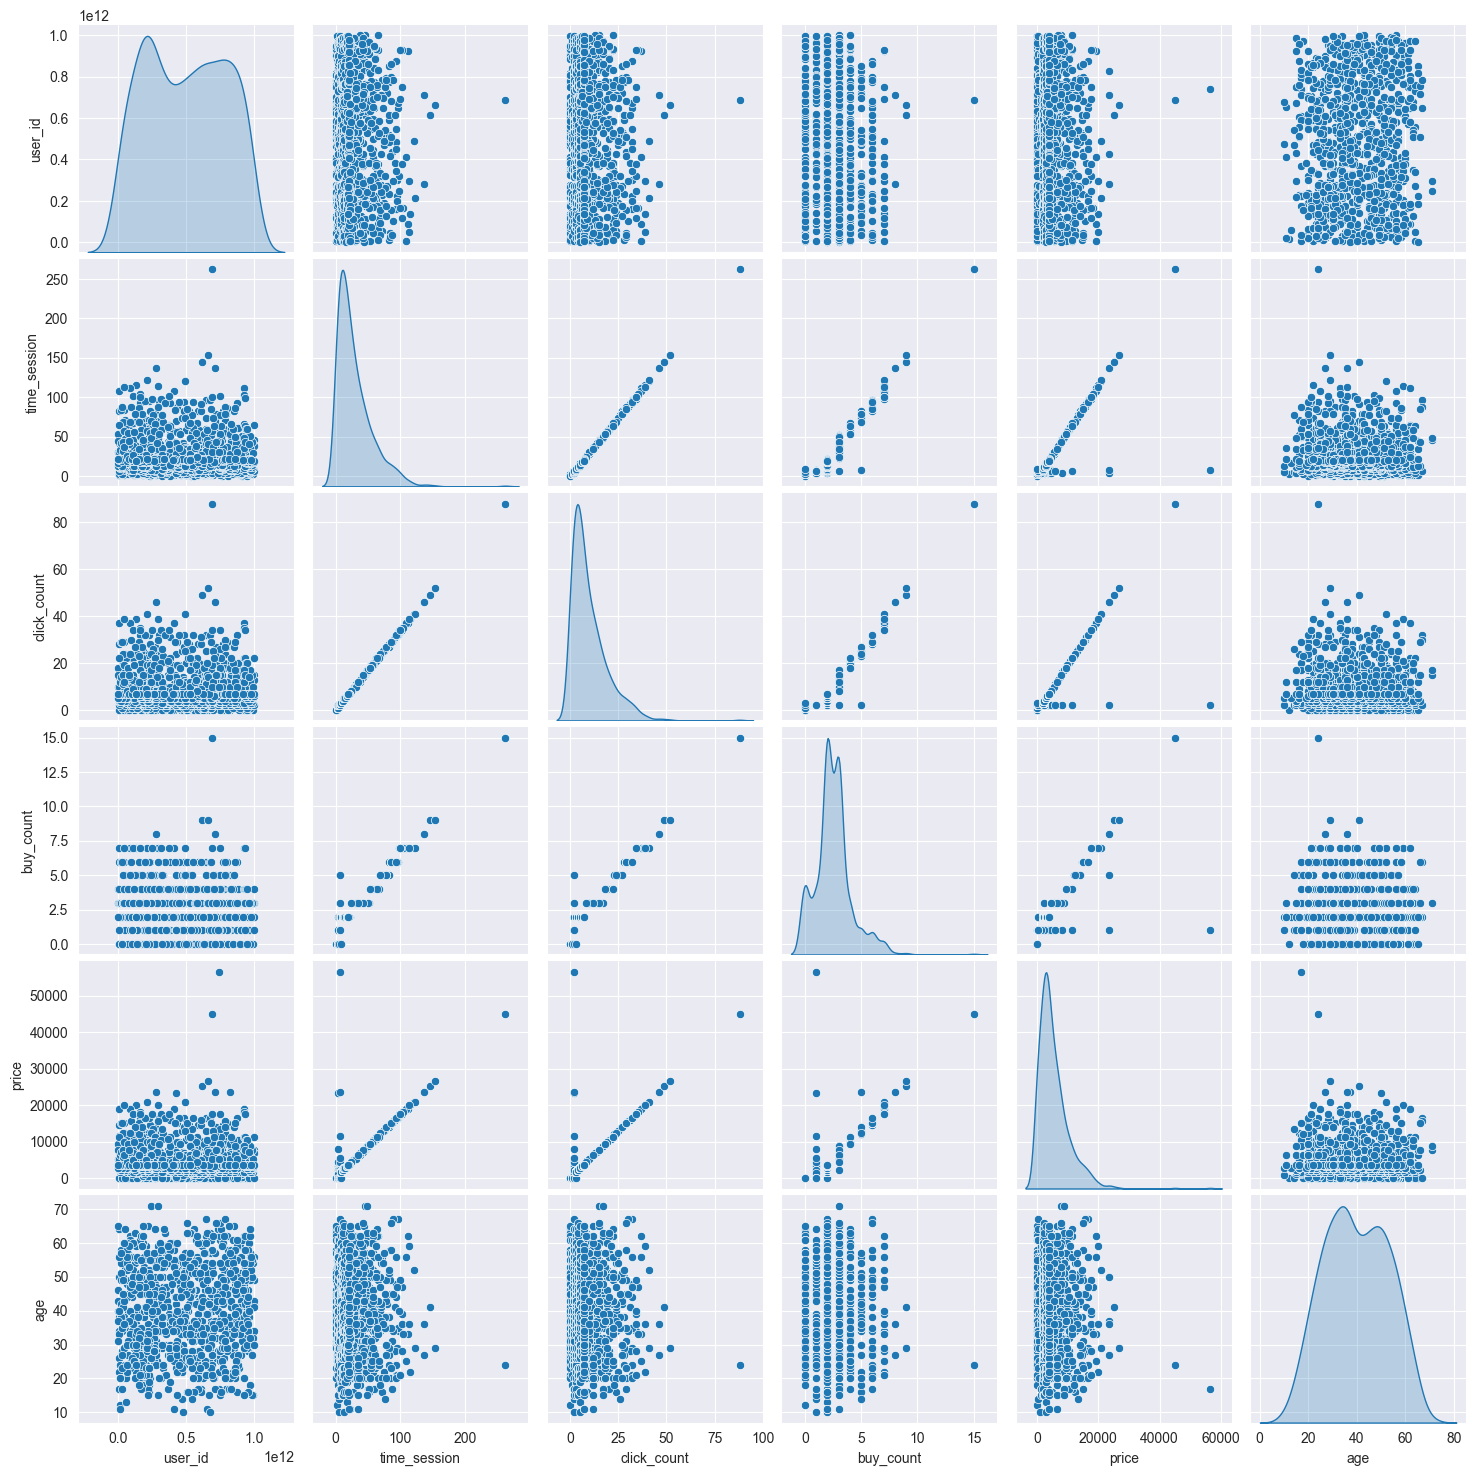

In [241]:
sn.pairplot(df, diag_kind='kde')

Из диаграммы выше можно сделать несколько выводов:
- Существует прямая и равномерная(?) зависимость между time_session и click_count, а так же buy_count и price. Зависимость наблюдается в любой комбинации колонок, так как она транзитивна.
- во всех параметрах (кроме user_id) наблюдается четкий пик в частоте повторения значений.

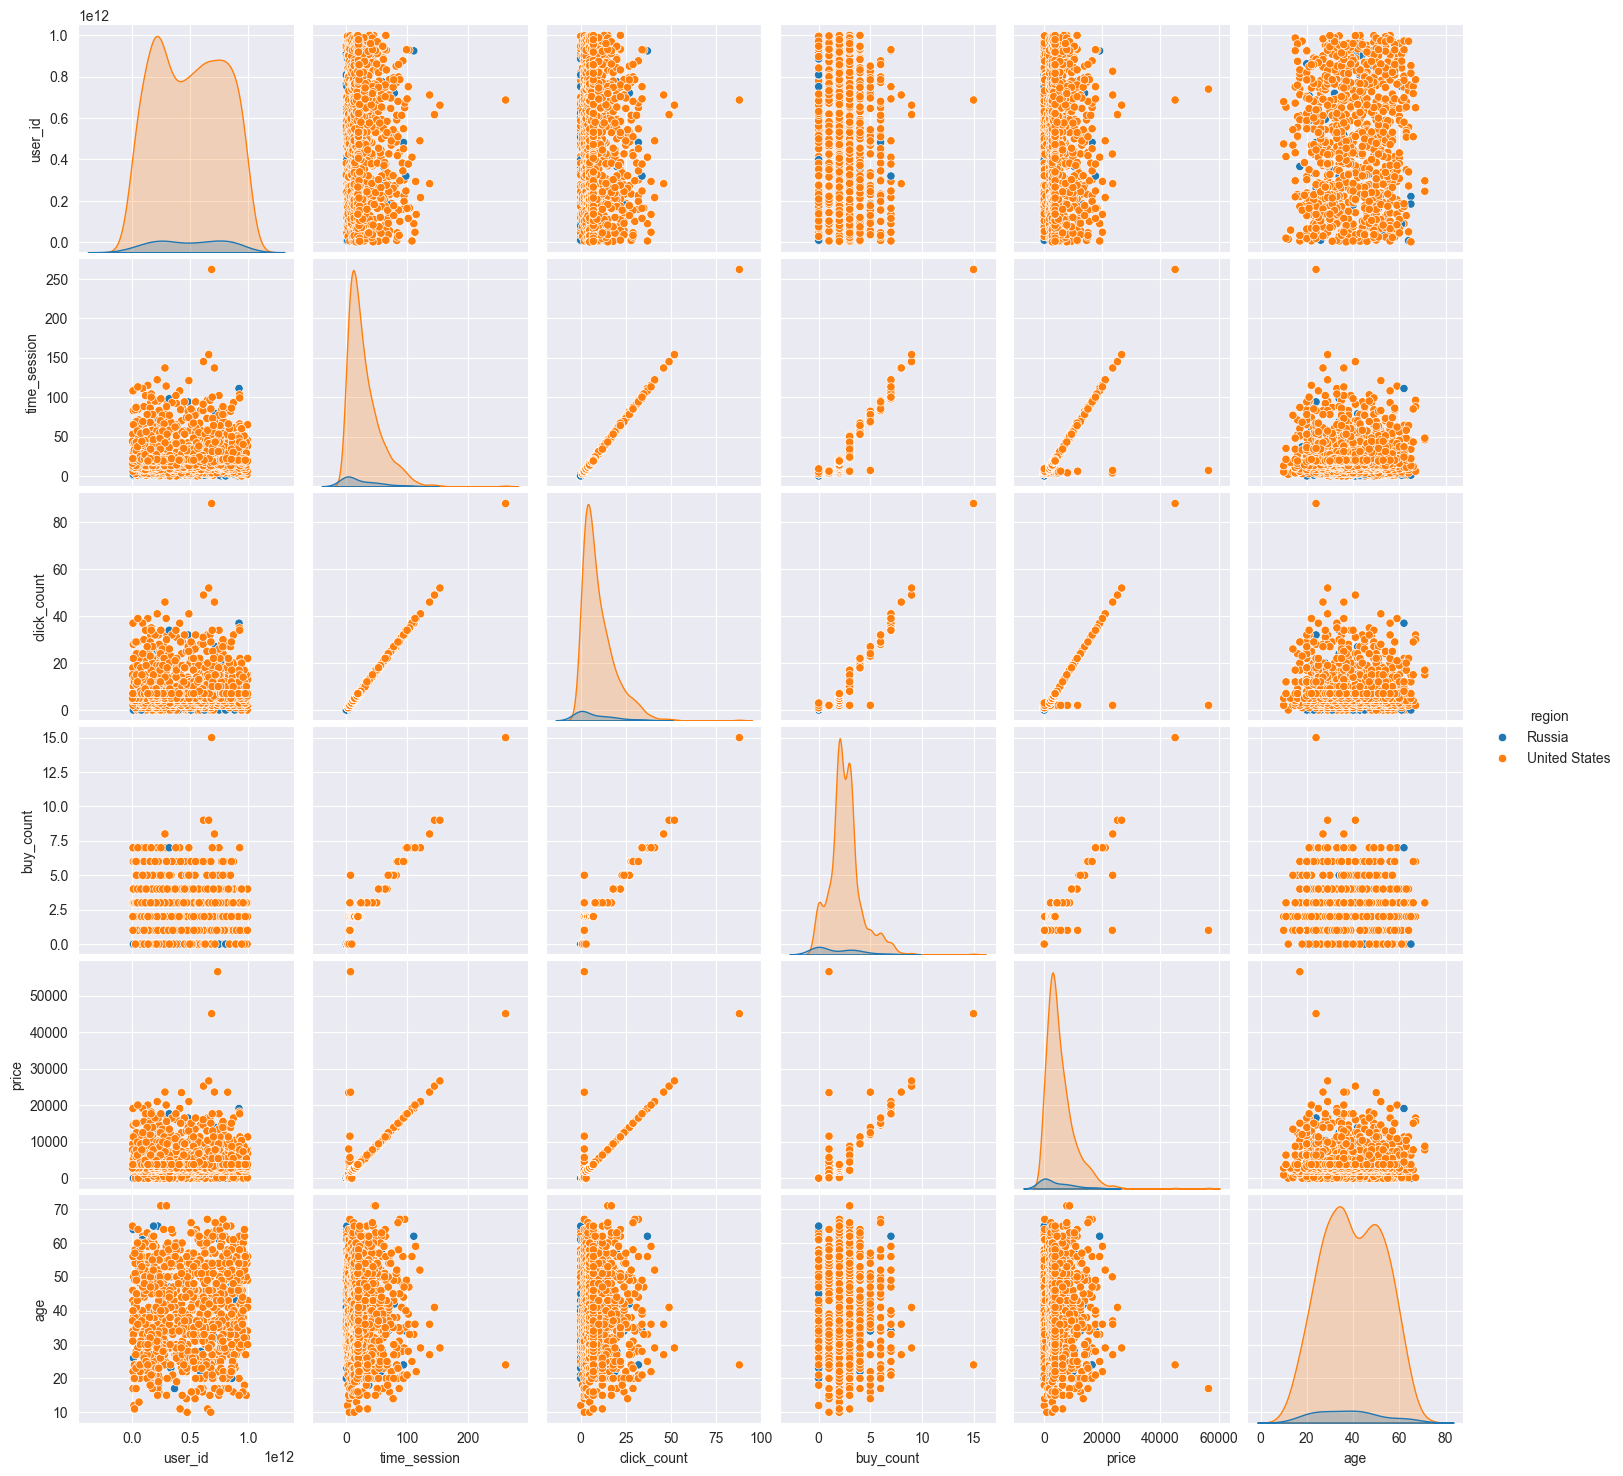

In [242]:
sn.pairplot(df, diag_kind='kde', hue='region')


In [243]:
df.region.value_counts()

region
United States    902
Russia            52
Name: count, dtype: int64

Малое количество записей с регионом Russia не позволяет заметить каких-либо отличительных черт регионов.
Распределение значений приблизительно совпадает по регионам.

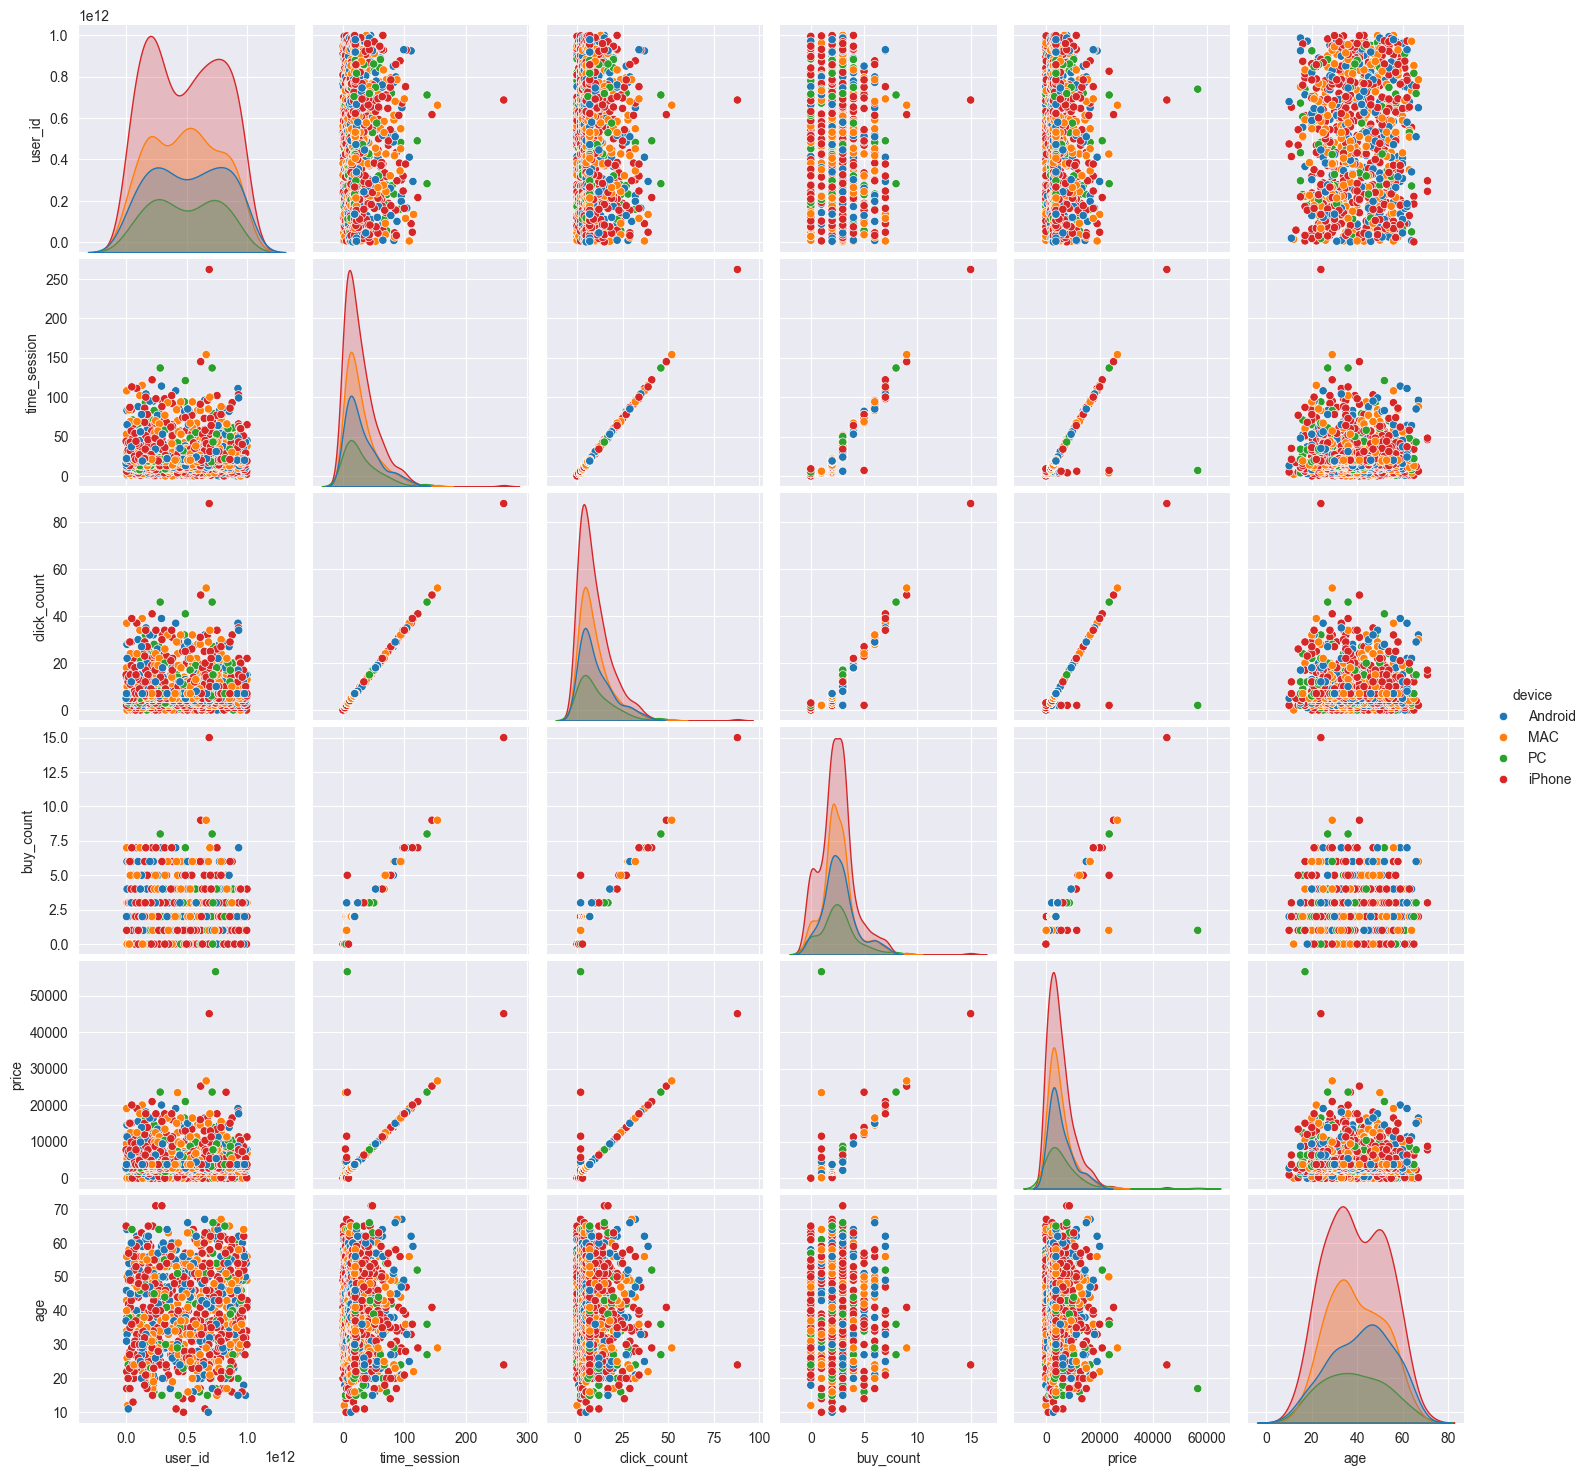

In [244]:
sn.pairplot(df, diag_kind='kde', hue='device')

Имеется достаточное количество данных, однако значимых различий между категориями не замечено.

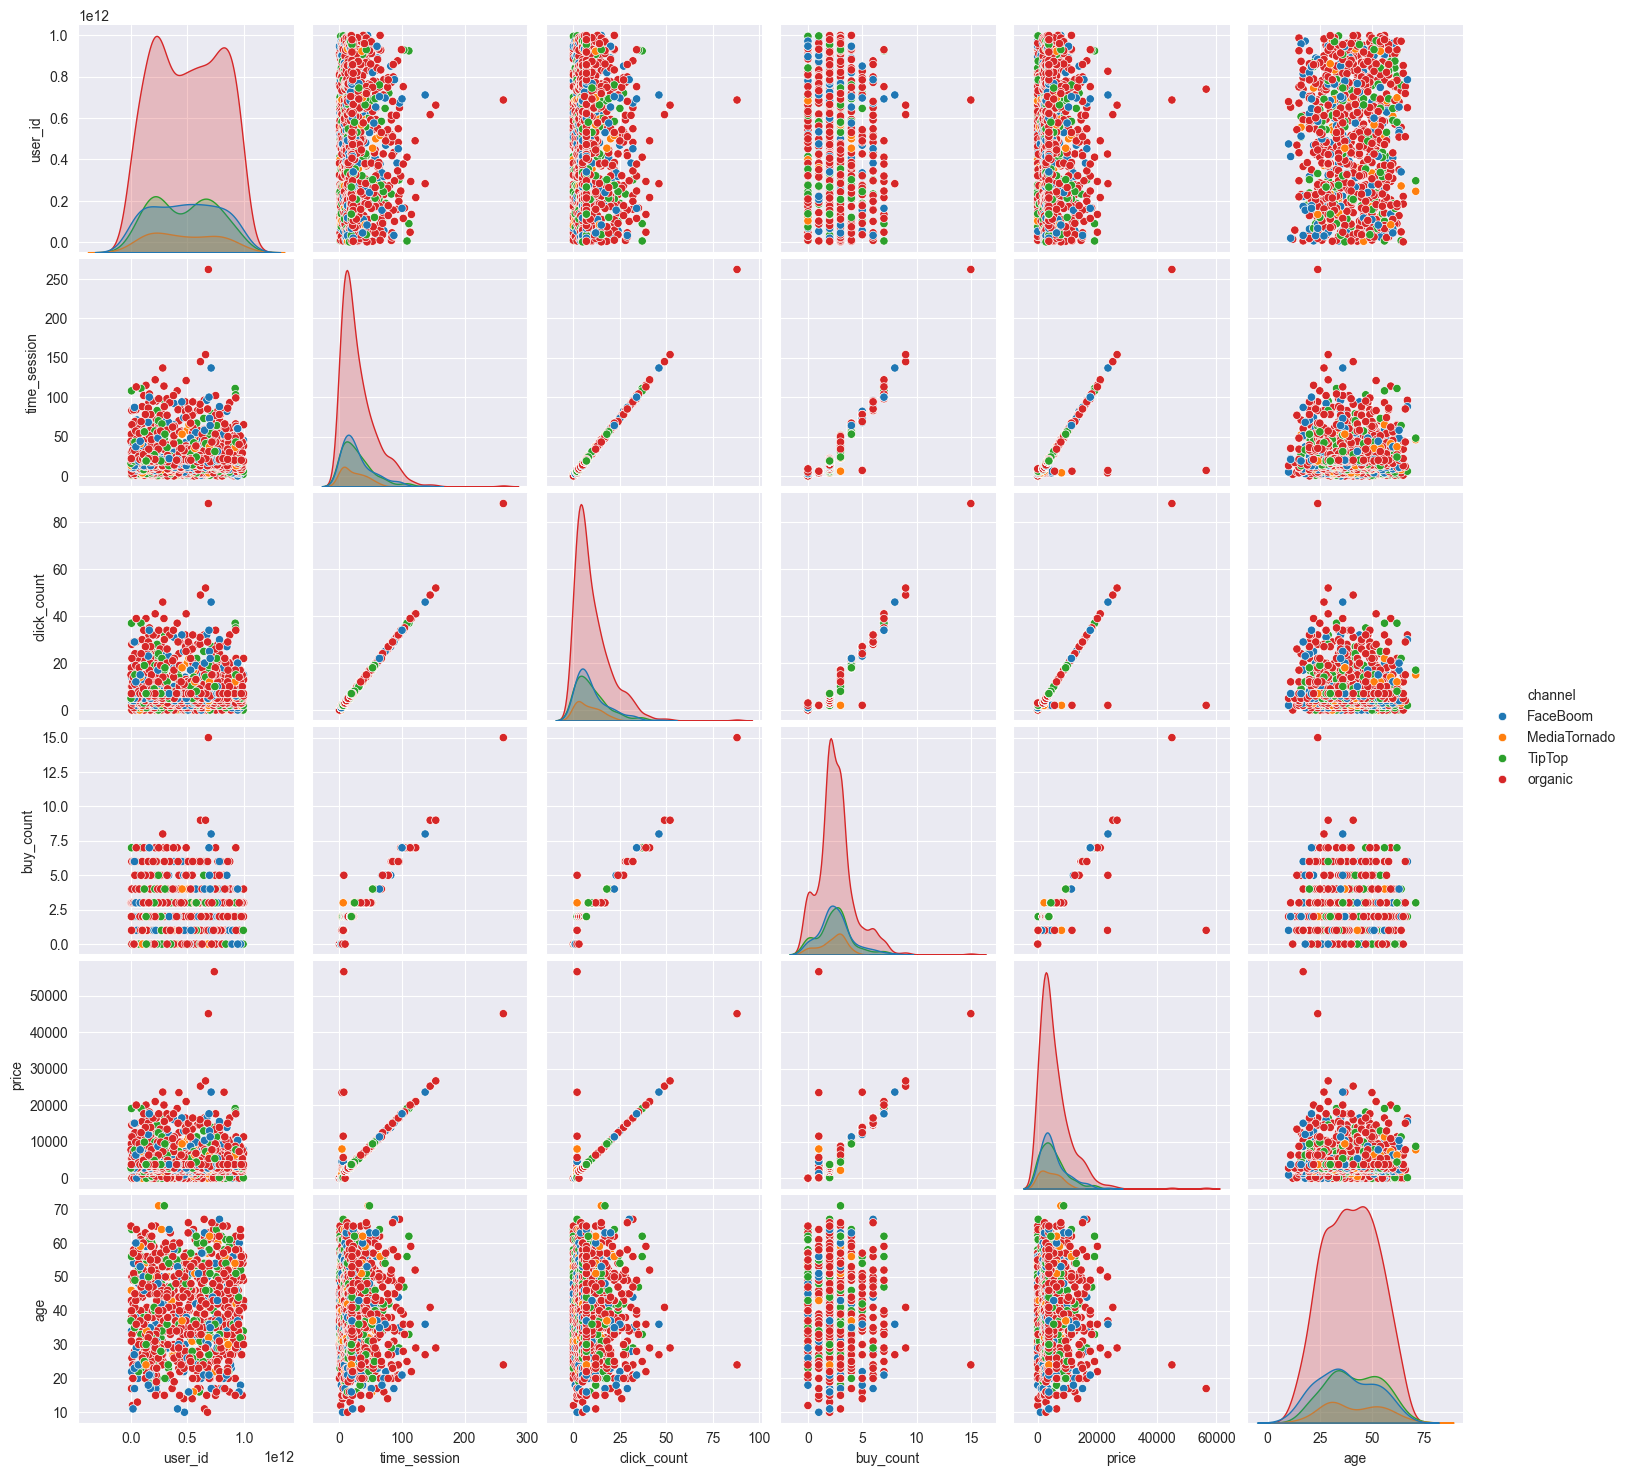

In [245]:
sn.pairplot(df, diag_kind='kde', hue='channel')

Имеется достаточное количество данных, однако значимых различий между категориями не замечено.


**Вывод**:
- При разделении на категории по региону, типу устройства или источнику трафика - категории не имеют значимых различий.
- Замечена прямая зависимость между следующими параметрами: time_session, click_count, buy_count, price.
- Каждый (кроме user_id, что правильно) из параметров имеет четкий пик (у age существует плато).

#### 6.2 Построение гистограммы
Используется sn.hist

In [246]:
for i in df.columns:
    print(f"sn.histplot(df['{i}'], kde=True, bins='auto')")

sn.histplot(df['user_id'], kde=True, bins='auto')
sn.histplot(df['region'], kde=True, bins='auto')
sn.histplot(df['device'], kde=True, bins='auto')
sn.histplot(df['channel'], kde=True, bins='auto')
sn.histplot(df['session_start'], kde=True, bins='auto')
sn.histplot(df['session_end'], kde=True, bins='auto')
sn.histplot(df['time_session'], kde=True, bins='auto')
sn.histplot(df['click_count'], kde=True, bins='auto')
sn.histplot(df['buy_count'], kde=True, bins='auto')
sn.histplot(df['price'], kde=True, bins='auto')
sn.histplot(df['age'], kde=True, bins='auto')


<Axes: xlabel='user_id', ylabel='Count'>

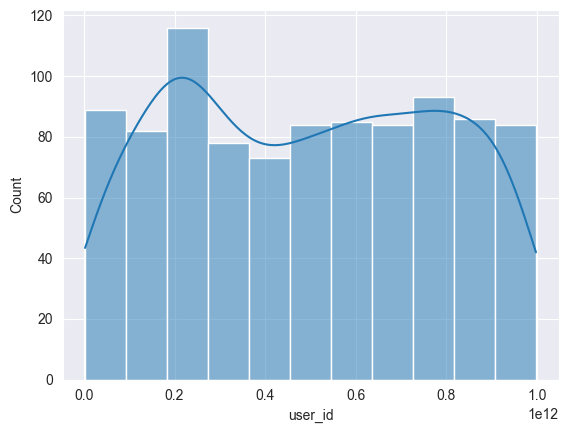

In [247]:
sn.histplot(df['user_id'], kde=True, bins='auto')


Из гистограммы по айди пользователей можно сделать вывод, что id работают как и необходимо - равномерно распределены по всему диапазону.

<Axes: xlabel='region', ylabel='Count'>

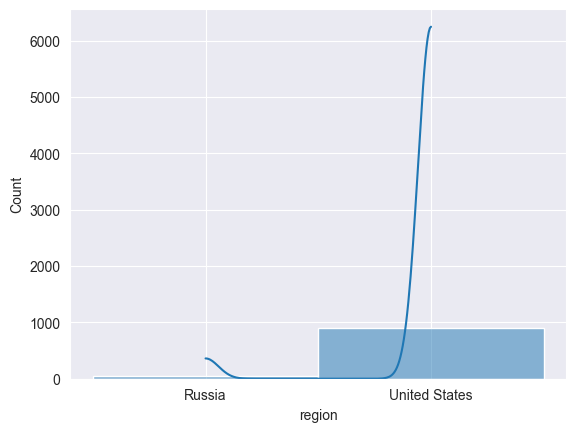

In [248]:
sn.histplot(df['region'], kde=True, bins='auto')

Из гистограммы по региону пользвателей видно, что подавляющее число пользователей находятся в США. Или что геолокация(?) логгирования работает с ошибкой :).

<Axes: xlabel='device', ylabel='Count'>

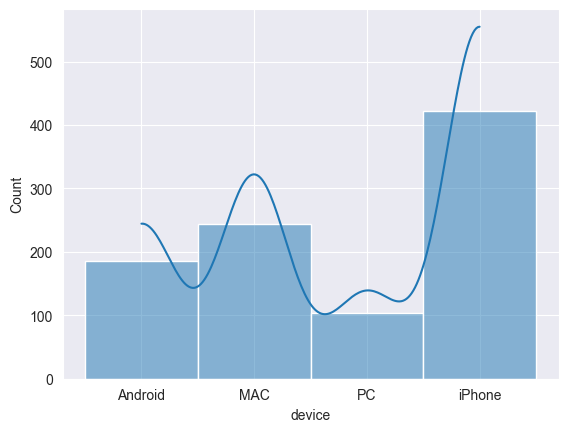

In [249]:
sn.histplot(df['device'], kde=True, bins='auto')


Из гистограммы видно, что большая часть пользователей использует мобильную платформу. Однако пользователи с компьютеров составляют значительную часть пользователей (около 30? процентов).

Количество пользователей на платформе от Apple составляет 2/3 и в мобильных ОС, и в компьютерных ос.

<Axes: xlabel='channel', ylabel='Count'>

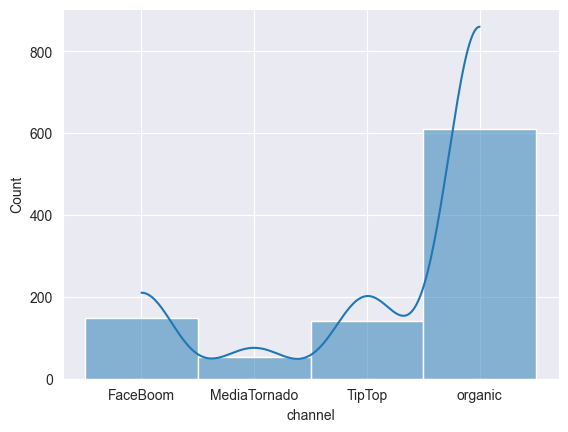

In [250]:
sn.histplot(df['channel'], kde=True, bins='auto')

Из гистограммы видно, что органический трафик составляет большую часть выборки. Однако FaceBoom и TipTop также имеют значительное значение. MediaTornado является самым малочисленным источником трафика.

<Axes: xlabel='session_start', ylabel='Count'>

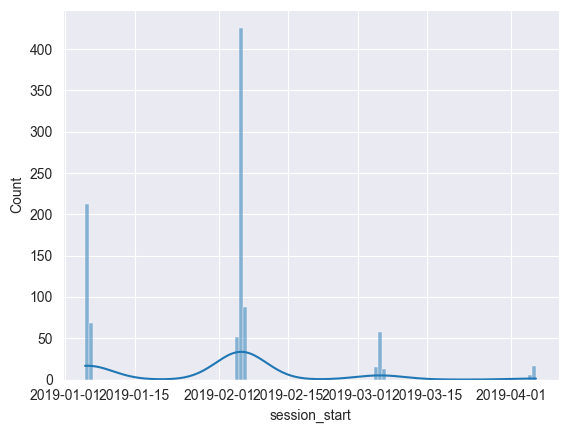

In [251]:
display(sn.histplot(df['session_start'], kde=True, bins=120))

Из гистограммы видно, что все переходы на сайт произошли в четырех отдельных и разнесенных по времени момента.

При наличии информации о тематике сайта, можно было бы сделать некоторые выводы исходя из моментов интереса пользователей. Возможно, сайт пользуется популярностью только во время праздников/выходных/других событий. Возможно, это служебный портал. Недостаточно данных.

<Axes: xlabel='session_end', ylabel='Count'>

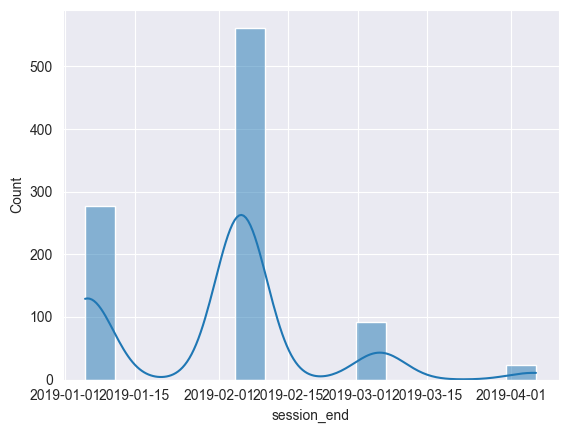

In [252]:
display(sn.histplot(df['session_end'], kde=True, bins='auto'))

Выводы по гистограмме окончания сессии пользователей полностью совпадают с выводами по предыдущей гистограмме.

<Axes: xlabel='time_session', ylabel='Count'>

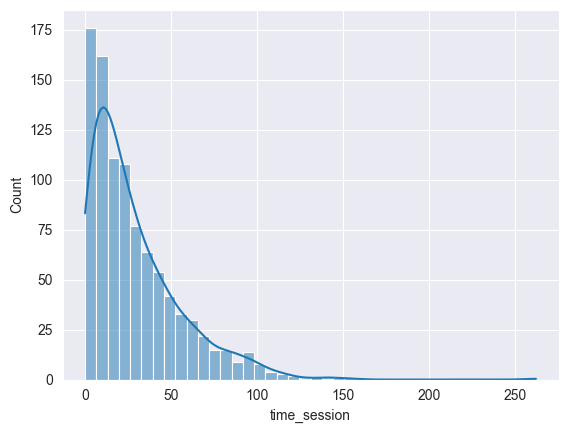

In [253]:
sn.histplot(df['time_session'], kde=True, bins='auto')


Из диаграммы видно, что пользователи в большинстве проводят на сайте меньше минуты.

Вероятно, большая часть из них - постоянные покупатели. Иначе нельзя объяснить, как они так быстро выбирают товар и проводят оплату. Возможно, этап оплаты не учитывается в данной метрике.

Однако, некоторые пользователи проводят на сайте до трех минут. Их количество незначительно, однако именно они совершают покупки на наибольшую сумму (согласно данным pairplot).

<Axes: xlabel='click_count', ylabel='Count'>

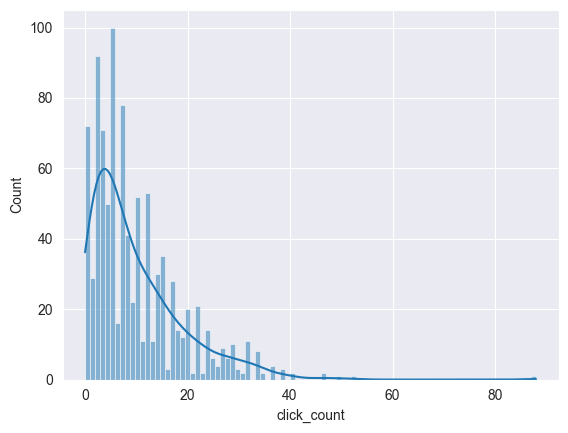

In [254]:
sn.histplot(df['click_count'], kde=True, bins=90)


Большая часть пользователей справляется с покупкой за 3-12 кликов, что свидетельствует о высокой эргономичности сайта.

Однако, некоторые из пользователей совершают существенно больше кликов - вероятно, выбирают больше товаров.

Заметна интересная тенденция пиков каждые 2 клика. Возможно, какая-то операция на сайте требует клика+подтверждения, что порождает такую тенденцию.

<Axes: xlabel='buy_count', ylabel='Count'>

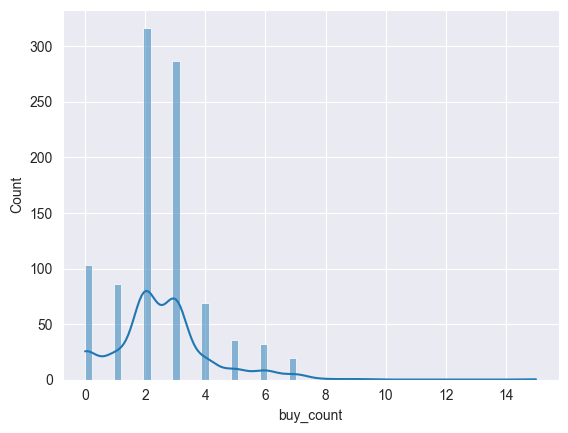

In [255]:
sn.histplot(df['buy_count'], kde=True, bins='auto')


Из гистограммы видно, что большая часть пользвателей не уходит с пустыми руками (отличный результат!!!).

Наиболее популярными количествами товаров являются 2 и 3 товара в заказе. На второй месте по популярности идут 2 и 4 товара. Можно сделать выводы о размере группы/компании/семьи/др покупателей.

Пользователи редко делают покупки объемом более 7 штук.

<Axes: xlabel='price', ylabel='Count'>

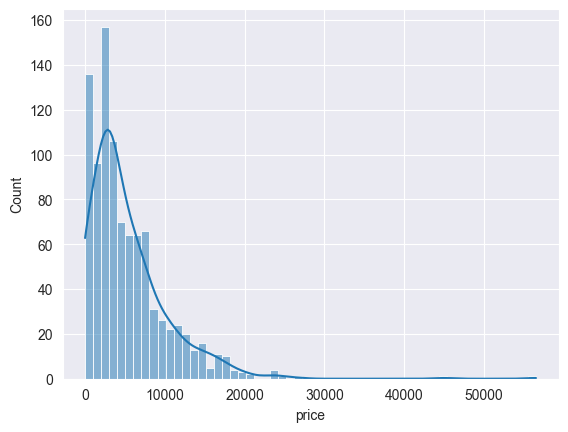

In [256]:
sn.histplot(df['price'], kde=True, bins='auto')


Из графика можно сделать вывод, что большая часть пользователей совершает покупки на сумму до 10_000.

Исключительно малое количество пользователей совершает покупки на сумму более 20_000.

<Axes: xlabel='age', ylabel='Count'>

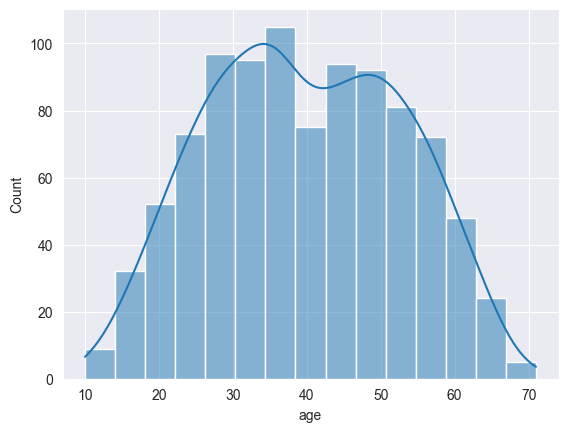

In [257]:
sn.histplot(df['age'], kde=True, bins='auto')

Из гистограммы видно, что сайтом пользуются все категории возрастов. Даже 10-летние (законно ли такое в нашей юрисдикции?) и 70-летние (отличный UI/UX?).

Заметно плато при возрасте пользователей от 25 до 55 лет, в которое попадает большая часть пользователей.

В целом демографика представляет странную форму (как по ~~мне~~ мнению исследователя), необходимо дальнейшее исследование предметной области.

#### 6.3 Ковариация, корреляция и heatmap

Ковариация - мерой совместной изменчивости двух случайных величин. Если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

In [258]:
df.cov(numeric_only=True)

,user_id,time_session,click_count,buy_count,price,age
user_id,8.407030e+22,-4.307910e+11,-1.461289e+11,-2.058998e+10,-5.507437e+13,2.357531e+11
time_session,-4.307910e+11,7.362982e+02,2.496686e+02,4.114414e+01,1.242224e+05,-1.283695e+01
click_count,-1.461289e+11,2.496686e+02,8.480639e+01,1.399729e+01,4.219587e+04,-4.225326e+00
buy_count,-2.058998e+10,4.114414e+01,1.399729e+01,2.566413e+00,7.083974e+03,-7.277724e-01
price,-5.507437e+13,1.242224e+05,4.219587e+04,7.083974e+03,2.560611e+07,-3.627071e+03
age,2.357531e+11,-1.283695e+01,-4.225326e+00,-7.277724e-01,-3.627071e+03,1.699902e+02


Выводы:
- user_id практически не коррелирует с другими параметрами (как и ожидалось)
- Возраст также слабо коррелирует с другими метриками
- Время сессии, клики и покупки тесно связаны - чем дольше пользователь находится на сайте, тем больше он кликает и совершает покупок
- Цена и возраст имеют отрицательную зависимость - возможно, более молодые пользователи покупают более дорогие товары

In [259]:
df.corr(numeric_only=True).round(3)

,user_id,time_session,click_count,buy_count,price,age
user_id,1.000,-0.055,-0.055,-0.044,-0.038,0.062
time_session,-0.055,1.000,0.999,0.946,0.905,-0.036
click_count,-0.055,0.999,1.000,0.949,0.905,-0.035
buy_count,-0.044,0.946,0.949,1.000,0.874,-0.035
price,-0.038,0.905,0.905,0.874,1.000,-0.055
age,0.062,-0.036,-0.035,-0.035,-0.055,1.000


Выводы:
- user_id практически не коррелирует с другими параметрами (как и ожидалось)
- Возраст также слабо коррелирует с другими метриками
- Время сессии, клики и покупки тесно связаны - чем дольше пользователь находится на сайте, тем больше он кликает и совершает покупок
- Цена и возраст имеют отрицательную зависимость - возможно, более молодые пользователи покупают более дорогие товары

## Задания

Задание 1

Использовать seaborn. По группировке - region и количество
клиентов, привлеченных из рекламных источников каждого типа (channel)
построить диаграмму следующего вида

<Axes: xlabel='channel', ylabel='Count'>

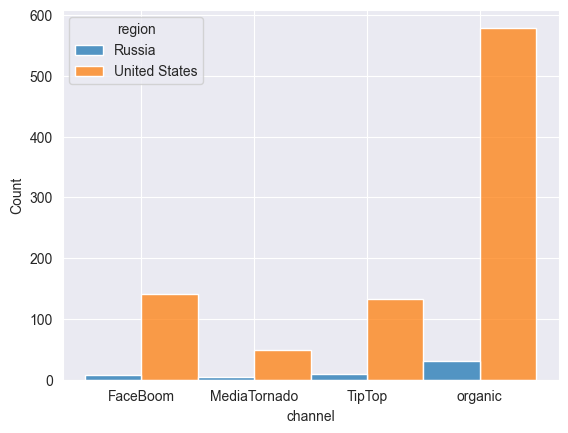

In [260]:
sn.histplot(df, x='channel', hue='region', multiple="dodge")

Результаты визуализации показывают отсутствие зависимости между каналом привлечения и страной происхождения.

Задание 2

Использовать pandas и plot. По сводной таблице (pivot_table) -
отобразить уникальное (nunique) количество пользователей для каждого канала
(channel). Оставить только маркеры в виде 🞀 синего цвета размером 15.

C:\Users\max\AppData\Local\Temp\ipykernel_3024\1365861709.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(values='user_id',index='channel',aggfunc='nunique')


,user_id
channel,
FaceBoom,147
MediaTornado,53
TipTop,139
organic,547


Text(0, 0.5, 'Кол-во пользователей')

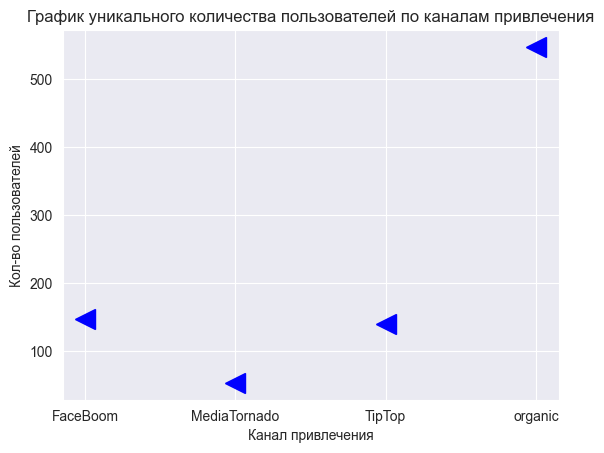

In [261]:

pivot_df = df.pivot_table(values='user_id',index='channel',aggfunc='nunique')

display(pivot_df)

plt.plot(pivot_df,
         marker='<', markersize=15, color='blue', linestyle='None')
plt.title('График уникального количества пользователей по каналам привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Кол-во пользователей')


Выводы по аналогичному графику были рассмотрены дважды выше в работе :(

Задание 3

Использовать matplotlib. Построить круговую диаграмму, которая
отображает процент каждого устройства (device)

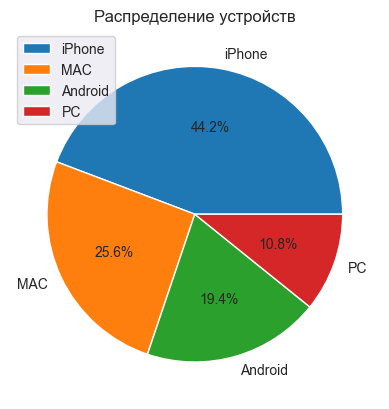

In [262]:
device_counts = df['device'].value_counts()

plt.pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%')
plt.title('Распределение устройств')
plt.legend()
